# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras import backend 

import pandas as pd
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

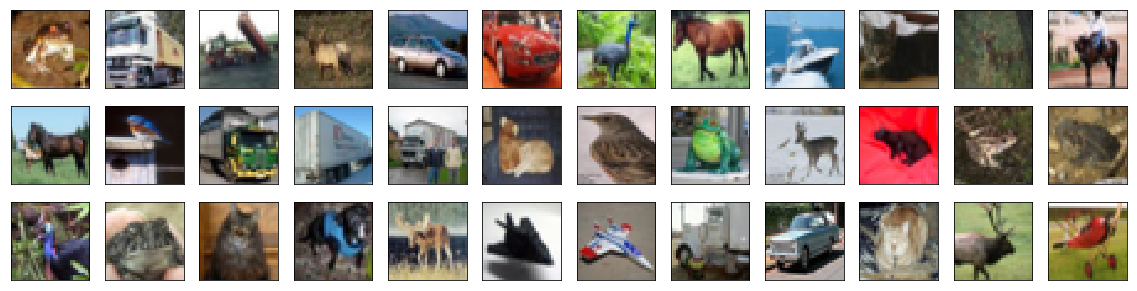

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])


### 7. Train the Model 
### 8. Load the Model with the Best Validation Accuracy


In [7]:
from os.path import exists
from keras.callbacks import ModelCheckpoint  
if not exists('model.weights.best.hdf5'):
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
    hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
              validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
              verbose=2, shuffle=True)
else: 
    # load the weights that yielded the best validation accuracy
    model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [8]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6751


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [9]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

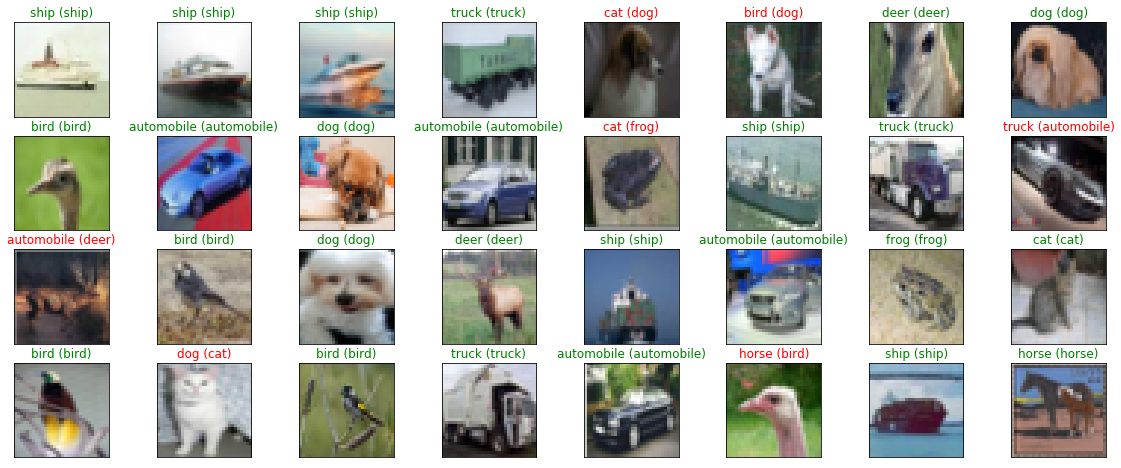

In [10]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### 11. Redefine the Model Architecture 

The suggested that we define the architecture. 

In [17]:
def build_cnn(filters, kernel_size=3, dropout = 0.1, optimizer='adam'): 
    '''Builds a simple cnn using 2 convolutions for each'''
    model = Sequential()

    
    for i in range(len(filters)): 
        if i==0:
            model.add(Conv2D(filters=filters[i], kernel_size=kernel_size, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
            model.add(Conv2D(filters = filters[i], kernel_size =kernel_size, padding= 'same', activation = 'relu'))
        else: 
            model.add(Conv2D(filters = filters[i], kernel_size =kernel_size, padding= 'same', activation = 'relu'))
            model.add(Conv2D(filters = filters[i], kernel_size =kernel_size, padding= 'same', activation = 'relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(dropout))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

def build_and_train_cnn(xtrain, ytrain, xvalid, yvalid, description='Model1', epochs=10, batch_size=32,
                        filters=None, kernel_size=3, dropout = 0.1, optimizer='adam'):
   
    
    if filters is None: 
        filters = [16,32]
    
    model = build_cnn(filters, kernel_size=kernel_size, dropout = dropout, optimizer=optimizer)
    
    base_accuracy = model.evaluate(xtrain,ytrain)[1]
    
    checkpointer = ModelCheckpoint(filepath='{}.best.hdf5'.format(description), verbose=1, 
                               save_best_only=True)
    
    hist = model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs,
              validation_data=(xvalid, yvalid), callbacks=[checkpointer], 
              verbose=2, shuffle=True)
    
    train_accuracy = model.evaluate(xtrain,ytrain)[1]
    valid_accuracy = model.evaluate(xvalid,yvalid)[1]
    
    
    return pd.DataFrame({'base':  base_accuracy,'train':train_accuracy, 'valid':valid_accuracy},
                        index = [description]
                       ),model

In [18]:
res,model1 = build_and_train_cnn(x_train, y_train, x_valid, y_valid, filters = [16], description='Model1' )

44704/45000 [============================>.] - ETA: 0sTrain on 45000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 1.16731, saving model to Model1.best.hdf5
14s - loss: 1.4454 - acc: 0.4808 - val_loss: 1.1673 - val_acc: 0.5768
Epoch 2/10
Epoch 00001: val_loss improved from 1.16731 to 1.02721, saving model to Model1.best.hdf5
15s - loss: 1.0954 - acc: 0.6102 - val_loss: 1.0272 - val_acc: 0.6392
Epoch 3/10
Epoch 00002: val_loss improved from 1.02721 to 0.94598, saving model to Model1.best.hdf5
15s - loss: 0.9324 - acc: 0.6718 - val_loss: 0.9460 - val_acc: 0.6688
Epoch 4/10
Epoch 00003: val_loss improved from 0.94598 to 0.91912, saving model to Model1.best.hdf5
15s - loss: 0.8130 - acc: 0.7120 - val_loss: 0.9191 - val_acc: 0.6822
Epoch 5/10
Epoch 00004: val_loss did not improve
14s - loss: 0.7060 - acc: 0.7500 - val_loss: 0.9205 - val_acc: 0.6874
Epoch 6/10
Epoch 00005: val_loss did not improve
14s - loss: 0.6093 - acc: 0.7866 - val_loss: 0.9312 -

In [19]:
res

,base,train,valid
Model1,0.079711,0.979956,0.697


In [20]:
res2,model12 = build_and_train_cnn(x_train, y_train, x_valid, y_valid, filters = [16], description='Model2', dropout=0.3 )

44832/45000 [============================>.] - ETA: 0sTrain on 45000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 1.15953, saving model to Model2.best.hdf5
14s - loss: 1.5136 - acc: 0.4556 - val_loss: 1.1595 - val_acc: 0.5912
Epoch 2/10
Epoch 00001: val_loss improved from 1.15953 to 0.97849, saving model to Model2.best.hdf5
15s - loss: 1.1437 - acc: 0.5961 - val_loss: 0.9785 - val_acc: 0.6570
Epoch 3/10
Epoch 00002: val_loss improved from 0.97849 to 0.94152, saving model to Model2.best.hdf5
15s - loss: 0.9952 - acc: 0.6463 - val_loss: 0.9415 - val_acc: 0.6712
Epoch 4/10
Epoch 00003: val_loss improved from 0.94152 to 0.91889, saving model to Model2.best.hdf5
15s - loss: 0.9041 - acc: 0.6787 - val_loss: 0.9189 - val_acc: 0.6852
Epoch 5/10
Epoch 00004: val_loss improved from 0.91889 to 0.88615, saving model to Model2.best.hdf5
15s - loss: 0.8248 - acc: 0.7081 - val_loss: 0.8862 - val_acc: 0.6898
Epoch 6/10
Epoch 00005: val_loss improved from 0.88

In [21]:
res3,model13 = build_and_train_cnn(x_train, y_train, x_valid, y_valid, filters = [16], description='Dropout02', dropout=0.2 )

44832/45000 [============================>.] - ETA: 0sTrain on 45000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 1.19018, saving model to Dropout02.best.hdf5
14s - loss: 1.4792 - acc: 0.4676 - val_loss: 1.1902 - val_acc: 0.5762
Epoch 2/10
Epoch 00001: val_loss improved from 1.19018 to 1.02703, saving model to Dropout02.best.hdf5
14s - loss: 1.1348 - acc: 0.5971 - val_loss: 1.0270 - val_acc: 0.6344
Epoch 3/10
Epoch 00002: val_loss improved from 1.02703 to 0.97613, saving model to Dropout02.best.hdf5
14s - loss: 1.0011 - acc: 0.6461 - val_loss: 0.9761 - val_acc: 0.6550
Epoch 4/10
Epoch 00003: val_loss improved from 0.97613 to 0.92967, saving model to Dropout02.best.hdf5
14s - loss: 0.8959 - acc: 0.6817 - val_loss: 0.9297 - val_acc: 0.6824
Epoch 5/10
Epoch 00004: val_loss improved from 0.92967 to 0.91770, saving model to Dropout02.best.hdf5
14s - loss: 0.8088 - acc: 0.7125 - val_loss: 0.9177 - val_acc: 0.6842
Epoch 6/10
Epoch 00005: val_loss did

In [24]:
filters = [16, 32]
drops = [0.1, 0.3, 0.9]

results = []
models = []

for d in drops:
    description = 'Filters_16_16_32_32_Dropout_{}'.format(d)
    r, m = build_and_train_cnn(x_train, y_train, x_valid, y_valid, filters = [16], description=description, dropout=d )
    results.append(r)
    models.append(m)
    

44864/45000 [============================>.] - ETA: 0sTrain on 45000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 1.12057, saving model to Filters_16_16_32_32_Dropout_0.1.best.hdf5
14s - loss: 1.4457 - acc: 0.4779 - val_loss: 1.1206 - val_acc: 0.5994
Epoch 2/10
Epoch 00001: val_loss improved from 1.12057 to 1.00384, saving model to Filters_16_16_32_32_Dropout_0.1.best.hdf5
14s - loss: 1.0940 - acc: 0.6134 - val_loss: 1.0038 - val_acc: 0.6492
Epoch 3/10
Epoch 00002: val_loss improved from 1.00384 to 0.96438, saving model to Filters_16_16_32_32_Dropout_0.1.best.hdf5
14s - loss: 0.9587 - acc: 0.6618 - val_loss: 0.9644 - val_acc: 0.6616
Epoch 4/10
Epoch 00003: val_loss improved from 0.96438 to 0.93777, saving model to Filters_16_16_32_32_Dropout_0.1.best.hdf5
15s - loss: 0.8502 - acc: 0.6986 - val_loss: 0.9378 - val_acc: 0.6744
Epoch 5/10
Epoch 00004: val_loss improved from 0.93777 to 0.93512, saving model to Filters_16_16_32_32_Dropout_0.1.best.h

In [26]:
pd.concat(results)

,base,train,valid
Filters_16_16_32_32_Dropout_0.1,0.102133,0.960889,0.6894
Filters_16_16_32_32_Dropout_0.3,0.111889,0.936844,0.6992
Filters_16_16_32_32_Dropout_0.9,0.102333,0.621489,0.5990


### Remarks: 
For the first model architecture we see an increase in validation accuracy with incrasing dropout. This is also the case for the second. 
Good enough for now. 